In [37]:
# import the package for the plotting graph 
using Plots
using ForwardDiff

In [38]:
slope(x1, y1, x2, y2) = (y2 - y1) / (x2 - x1)

slope (generic function with 1 method)

In [39]:
interpolate(x, x1, y1, x2, y2) = y1 + slope(x1, y1, x2, y2) * (x - x1)

interpolate (generic function with 1 method)

In [40]:
function find_interpolations(new_x_values,points)
    new_y_values = []
    for i in 1:length(new_x_values)
        for j in 1:length(points)-1
            if new_x_values[i] >= points[j][1] && new_x_values[i] <= points[j+1][1]
                push!(new_y_values, interpolate(new_x_values[i], points[j][1], points[j][2], points[j+1][1], points[j+1][2]))
            end
        end
    end
    return new_y_values
end

find_interpolations (generic function with 1 method)

In [41]:

# Define the points as a list of tuples (x, y)
points = [(1, -8), (2, -1.0), (3, 18)]

x_points = [point[1] for point in points]
y_points = [point[2] for point in points]

# Calculate the interpolated value at x = 2.5
x_value = 2.5
y_interpolated = 0.0
# for function f(x) 
for i in 1:(length(points) - 1)
    if x_value >= points[i][1] && x_value <= points[i+1][1]
        y_interpolated = interpolate(x_value, points[i][1], points[i][2], points[i+1][1], points[i+1][2])
        println("The interpolated value at x = $x_value is $y_interpolated")
        break
    end
end

# calculate the slope at x = 2.5
x_value1= 2.0
for i in 1:(length(points) - 1)
    if x_value1 >= points[i][1] && x_value1 <= points[i+1][1]
        dy_dx = slope(points[i][1], points[i][2], points[i+1][1], points[i+1][2])
        println("The slope value at x = $x_value1 is $dy_dx")
        break
    end
end

# for function f'(x)
for i in 1:(length(points) - 1)
    if x_value >= points[i][1] && x_value <= points[i+1][1]
        dy_dx = ForwardDiff.derivative(x -> interpolate(x_value, points[i][1], points[i][2], points[i+1][1], points[i+1][2]), x_value)
        println("The slope value at x = $x_value is $dy_dx")
        break
    end
end



The interpolated value at x = 2.5 is 8.5
The slope value at x = 2.0 is 7.0
The slope value at x = 2.5 is 0.0


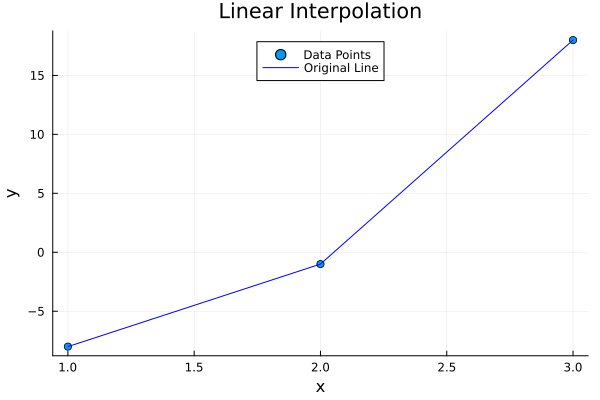

In [42]:
scatter(x_points, y_points, label="Data Points", legend=:top, title="Linear Interpolation", xlabel="x", ylabel="y")
plot!(x_points, y_points, label="Original Line", color=:blue)


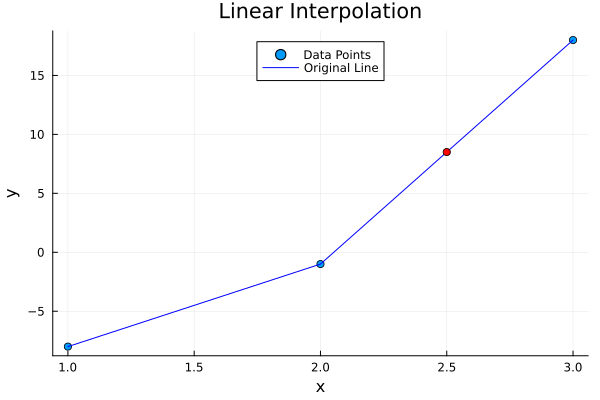

In [43]:
scatter!([x_value], [y_interpolated], label="", color=:red, markersize=4)

In [46]:
new_x_values = [1.5, 2.5,1.2,2.3]
new_y_values = find_interpolations(new_x_values, points)

4-element Vector{Any}:
 -4.5
  8.5
 -6.6000000000000005
  4.699999999999997

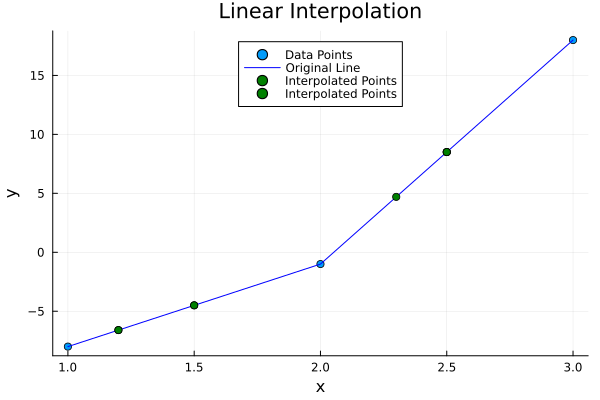

In [47]:
scatter!(new_x_values, new_y_values, label="Interpolated Points", color=:green, markersize=4)